# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from webdriver_manager.chrome import ChromeDriverManager
executable_path = {'executable_path':ChromeDriverManager().install()}

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
url='https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser=Browser('chrome',**executable_path,headless=True)
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object

html = browser.html
html_soup = soup(html, 'html.parser')

df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

In [14]:
type(df)

list

In [15]:
len(df)

1

In [16]:
# Extract all rows of data
print(df)

[        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
mars_df=df[0]

In [19]:
mars_df.columns=['id', 'terrestrial_date', 'sol','ls','month','min_temp','pressure']

In [23]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [25]:
table = html_soup.find('table', class_='table')

In [34]:
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [37]:
# Create an empty list
results=[]

# Loop through the scraped data to create a list of rows
rows=table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [113]:
columns=rows[0]
columns


<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>

In [109]:
row_data=rows[1::]

In [100]:
all_rows=[]

In [101]:
for row in row_data:
    row_value=row.find_all('td')
    results=[item.text for item in row_value]
    all_rows.append(results)   

In [103]:
all_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [115]:
columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure']

In [121]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(all_rows, columns = ['id','terrestrial_date','sol','ls','month','min_temp','pressure'])
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [122]:
# Confirm DataFrame was created successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [123]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [125]:
# Change data types for data analysis
df = df.astype({"id": int}, errors='raise')

In [132]:
df["terrestrial_date"] = df["terrestrial_date"].astype('datetime64[ns]')

In [133]:
df = df.astype({"sol": float}, errors='raise')

In [134]:
df = df.astype({"ls": float}, errors='raise')

In [135]:
df = df.astype({"month": float}, errors='raise')

In [136]:
df = df.astype({"min_temp": float}, errors='raise')

In [137]:
df= df.astype({"pressure": float}, errors='raise')

In [138]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [148]:
# 1. How many months are there on Mars?
months_amount=df["month"].nunique()
print(f'Number of months in Mars is {months_amount}.')

Number of months in Mars is 12.


In [305]:
# 2. How many Martian days' worth of data are ther
Mars_days= df['sol'].max() - mars_df['sol'].min()
print(f'Number of days in Mars is {Mars_days}.')

Number of days in Mars is 1967.0.


In [220]:
# 3. What is the average low temperature by month?
month_temp_df=df.loc[:,["month","min_temp"]].head()
month_temp_df

,month,min_temp
0,6.0,-75.0
1,6.0,-76.0
2,6.0,-76.0
3,6.0,-74.0
4,6.0,-74.0


In [218]:
aver_temp=month_temp_df["min_temp"].mean()
print(f'Average Temp in Mars is {aver_temp}.')

Average Temp in Mars is -72.04.


In [222]:
mtemp_df=df.groupby(["month"])
mtemp_df

In [297]:
aver_temp_df=mtemp_df['min_temp'].mean()

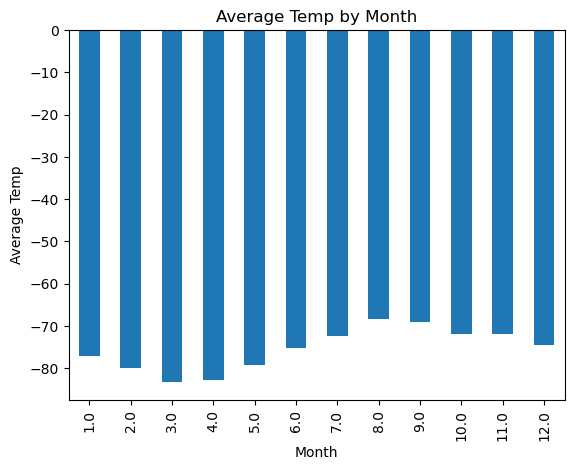

<Figure size 640x480 with 0 Axes>

In [298]:
# Plot the average temperature by month
aveTemp_chart = aver_temp_df.plot(kind="bar", title="Average Temp by Month")
aveTemp_chart.set_xlabel("Month")
aveTemp_chart.set_ylabel("Average Temp")

plt.show()
plt.tight_layout()

In [299]:
# Identify the coldest and hottest months in Curiosity's location
pressure_temp_df=df.loc[:,["pressure","month"]].head()
results_df=pressure_temp_df.sort_values("pressure", ascending=True)


results_df.head()

,pressure,month
3,732.0,6.0
0,739.0,6.0
1,740.0,6.0
4,740.0,6.0
2,741.0,6.0


In [300]:
minPressure=results_df['pressure'].min()
print(f'Lowest pressure in Mars is {minPressure}.')

Lowest pressure in Mars is 732.0.


In [301]:
maxPressure=results_df['pressure'].max()
print(f'Highest pressure in Mars is {maxPressure}.')

Highest pressure in Mars is 741.0.


In [302]:
# 4. Average pressure by Martian month
pressure_month_df=df.groupby(['month'])

In [303]:
pressure_month_df['pressure'].mean()

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64

In [291]:
aver_pressure=pressure_month_df['pressure'].mean()

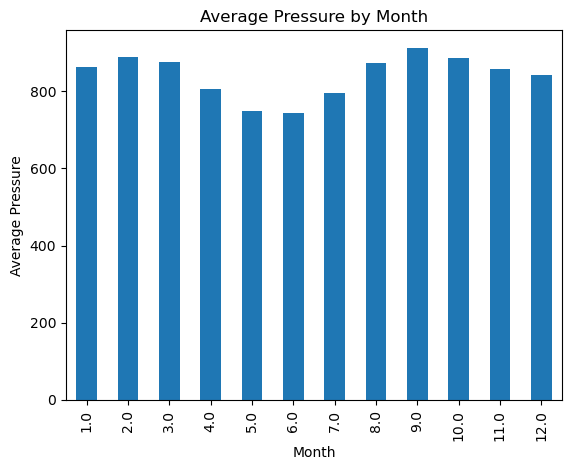

<Figure size 640x480 with 0 Axes>

In [292]:
# Plot the average pressure by month
avePer_chart = aver_pressure.plot(kind="bar", title="Average Pressure by Month")
avePer_chart.set_xlabel("Month")
avePer_chart.set_ylabel("Average Pressure")

plt.show()
plt.tight_layout()

In [381]:
# 5. How many terrestrial (earth) days are there in a Martian year?
temp_sols_df=df.groupby(['sol'])

In [382]:
mars_sol_temp=temp_sols_df['min_temp'].mean()
mars_sol_temp

sol
10.0     -75.0
11.0     -76.0
12.0     -76.0
13.0     -74.0
14.0     -74.0
          ... 
1973.0   -78.0
1974.0   -77.0
1975.0   -76.0
1976.0   -77.0
1977.0   -77.0
Name: min_temp, Length: 1867, dtype: float64

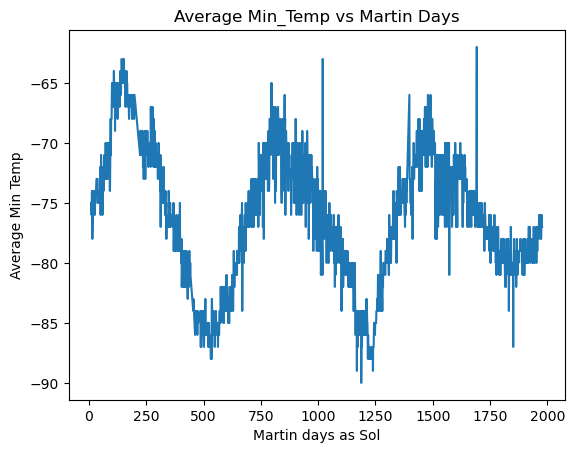

<Figure size 640x480 with 0 Axes>

In [391]:
# Plot the average pressure by month
mars_sol_temp_chart = mars_sol_temp.plot(kind="line", title="Average Min_Temp vs Martin Days")
mars_sol_temp_chart.set_xlabel("Martin days as Sol")
mars_sol_temp_chart.set_ylabel("Average Min Temp")

plt.show()
plt.tight_layout()

In [392]:
diffInpeaks = 1425-750
diffinpeaks=675

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [393]:
# Write the data to a CSV
df.to_csv("output/dataframe.csv", index=False)

In [394]:
browser.quit()